In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv', engine='python')
df.head()

In [ ]:
df.info()

In [ ]:
df['Genre'].value_counts()

In [ ]:
df['Genre'].value_counts(normalize=True)

There are more non-fiction books in the bestselling rankings, with about 56% of the bestselling dataset belonging to non-fiction books, this includes everything from memoirs to art and photography books.

## Book Ratings

In [ ]:
# Top rated books (Revieved by at least 3000 people)
data_order = df.groupby(['Name', 'Author', 'Genre'], as_index=False)[['User Rating', 'Reviews']].mean()
data_order = data_order[data_order['Reviews']>3000]
data_order = data_order.sort_values('User Rating', ascending=False).head(20)
data_order

Ranking by rating gives a relatively high number of max (4.9) ratings, however, we can see significant differences in the number of reviews, with some books having just over 3000 reviews while some have about 20,000.

A weighted rating, that takes into consideration the number of reviews, will be a better option for this ranking.

$$WeightedRating(WR)=(\frac{v}{v+m}\cdot R)+(\frac{m}{v+m}\cdot C)$$

*where R = average rating for the book*

*v = number of reviews for the book*

*m = minimum reviews required to be listed in the best seller list*

*C = the mean rating in the dataset* 

In [ ]:
# Weighted rating
m = min(df['Reviews'])
C = df['User Rating'].mean()
def weighted_rating(x, m=m, C=C):
    v = x['Reviews']
    R = x['User Rating']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
df['Weighted Rating'] = df.apply(weighted_rating, axis=1)

In [ ]:
df.groupby(['Name','Author','Genre'], as_index=False)[['User Rating', 'Reviews', 'Weighted Rating']].mean().sort_values(by='Weighted Rating', ascending=False).head(10)

While a number of rows in the weighted rating column can still be rounded up to 4.9, there is enough of a difference between the various books that they can be ranked. 

As an aside, Nine of the the Top 10 books, according to the weighted rankings are in the fiction genre. This could be taken as a sign of the fiction genre's dominance in rating rankings.

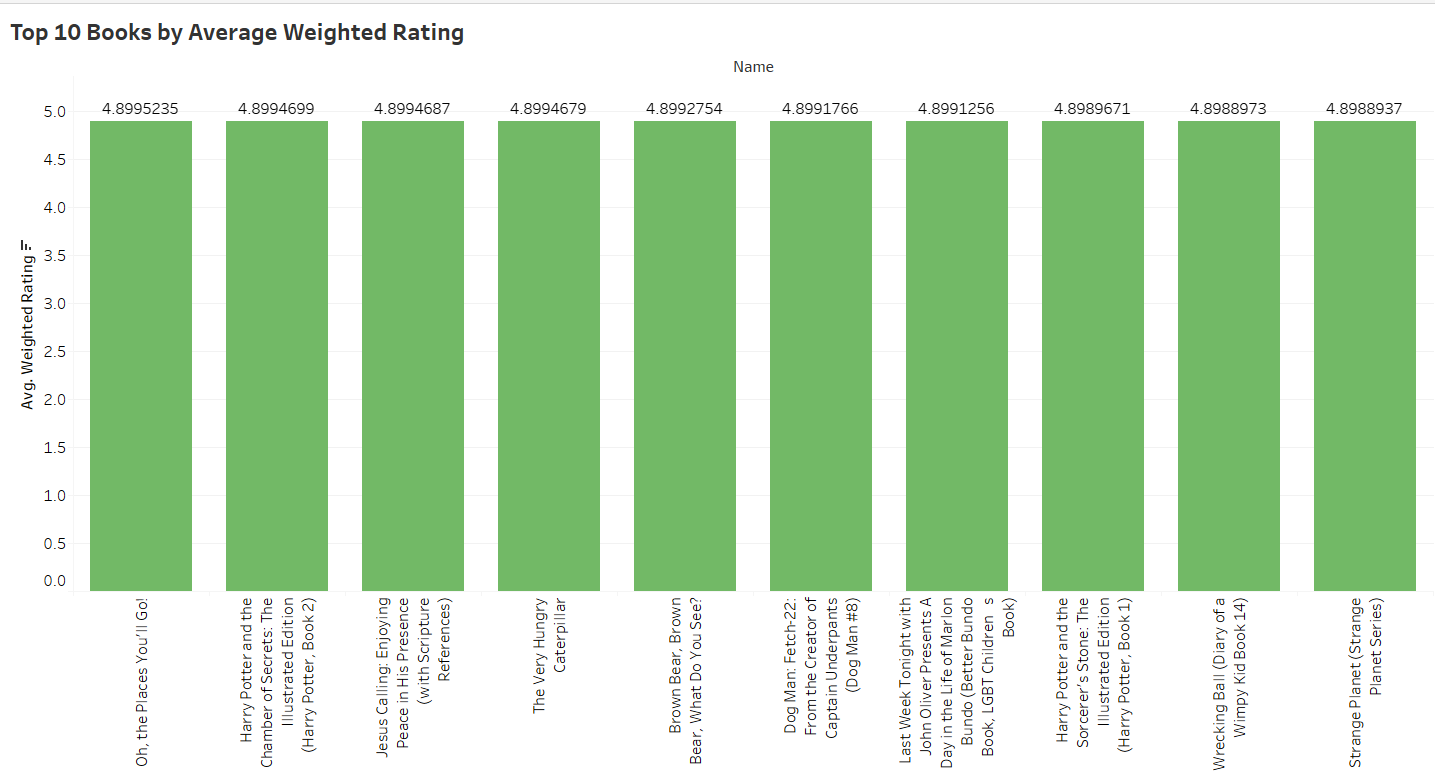

Dr. Seuss's 'Oh, the Places You'll Go!' comes out on top of the Weighted Rating rankings by an edge, with 21,834 reviews and a number of them overwhelmingly positive. Originally published in 1990, the "Children's literature" book has been well liked by most people who purchase it.

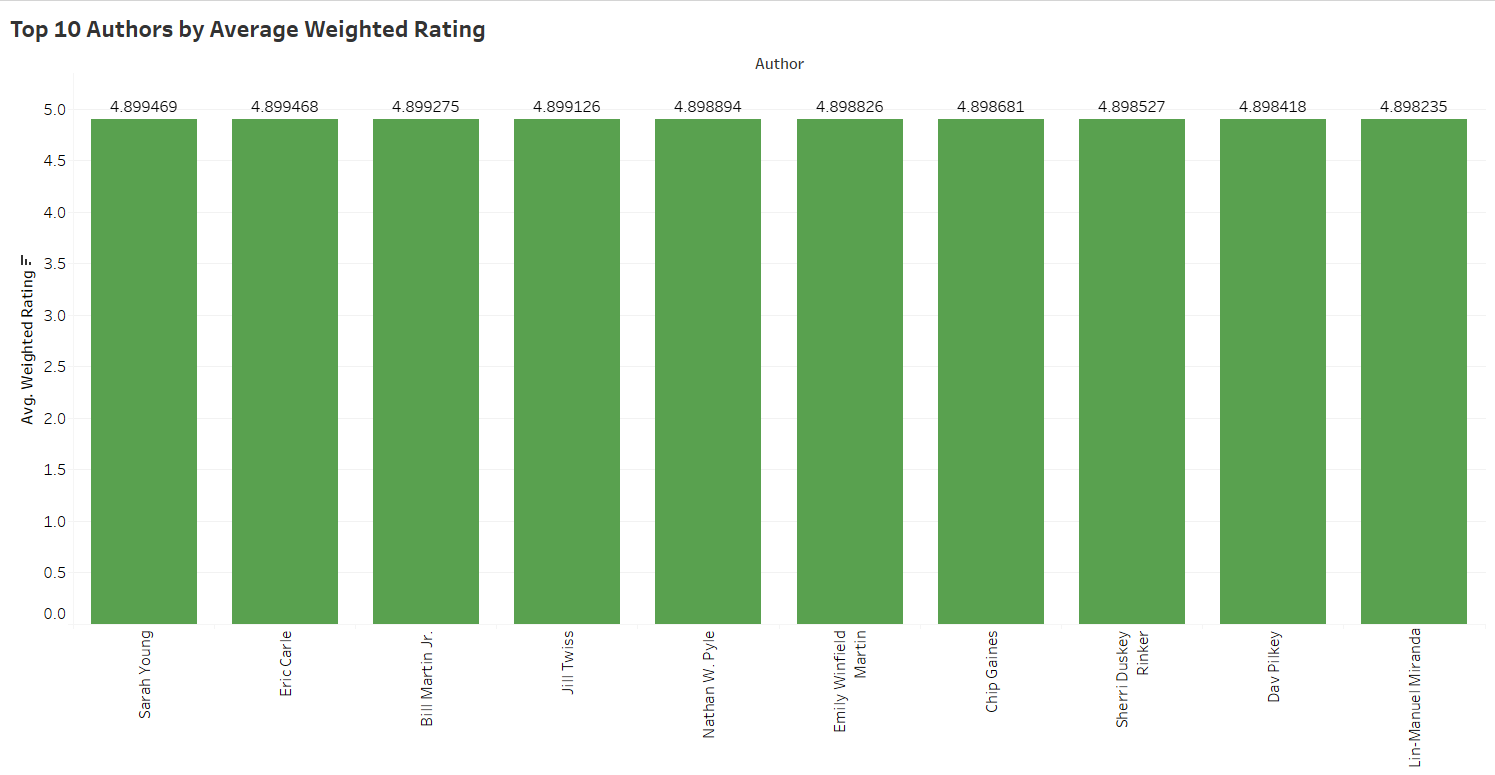

Sarah Young with her sole entry in the Top 50 Bestselling books, 'Jesus Calling: Enjoying Peace in His Presence (with Scripture References)' tops the ranking for Authors in Weighted Ratings. The 2004 Christian literature, Inspirational was reviewed 19,576 times

In [ ]:
df.groupby(['Genre'])['Weighted Rating'].mean()

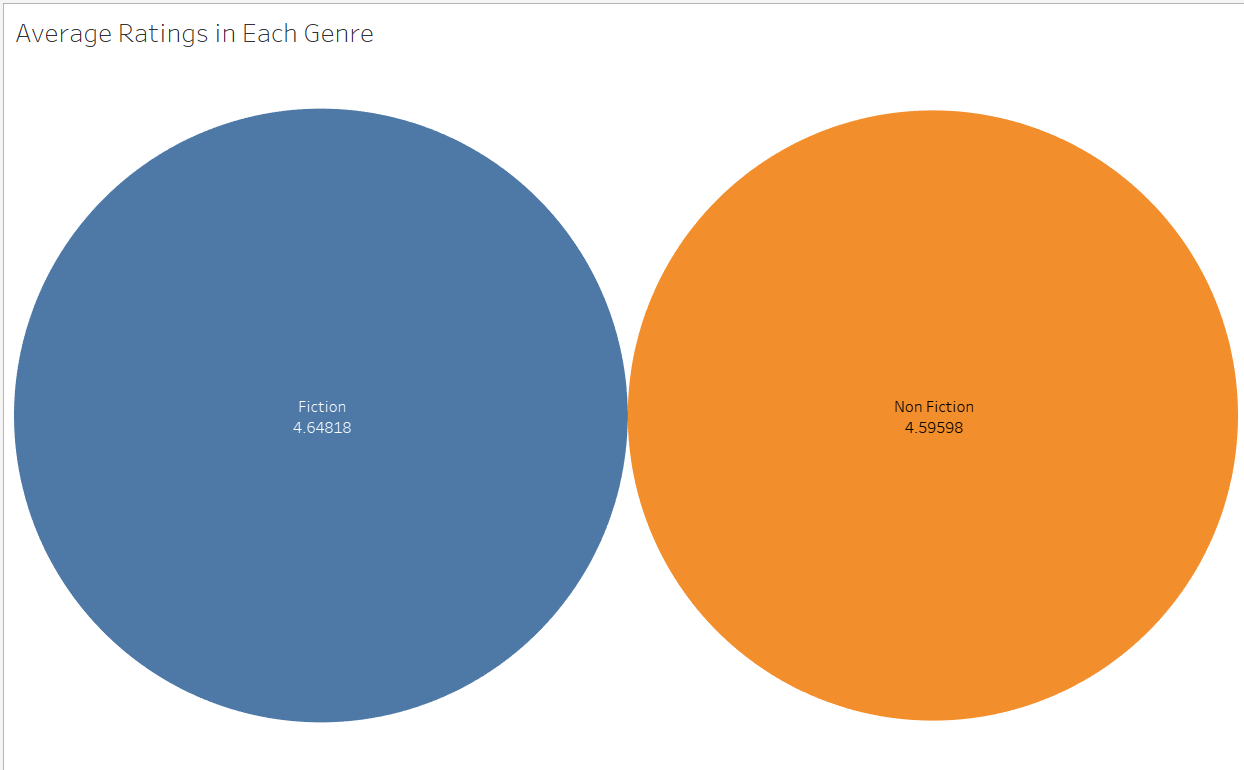

## Book Price

Here, we will look at patterns in book price in the Top 50 Bestselling books on Amazon

In [ ]:
df.groupby(['Name', 'Author', 'Genre'], as_index=False)['Price'].mean().sort_values('Price', ascending=False).head(10)

There are 6 non-fiction books out of the top 10 most expensive bestsellers on Amazon. Looking at the rankings, the fiction books in the Top 5 are collections or combinations of a book series, while the non-fiction books are instructional, educational texts. Both genres are priced expensively because of their larger size (relatively large amount of pages).

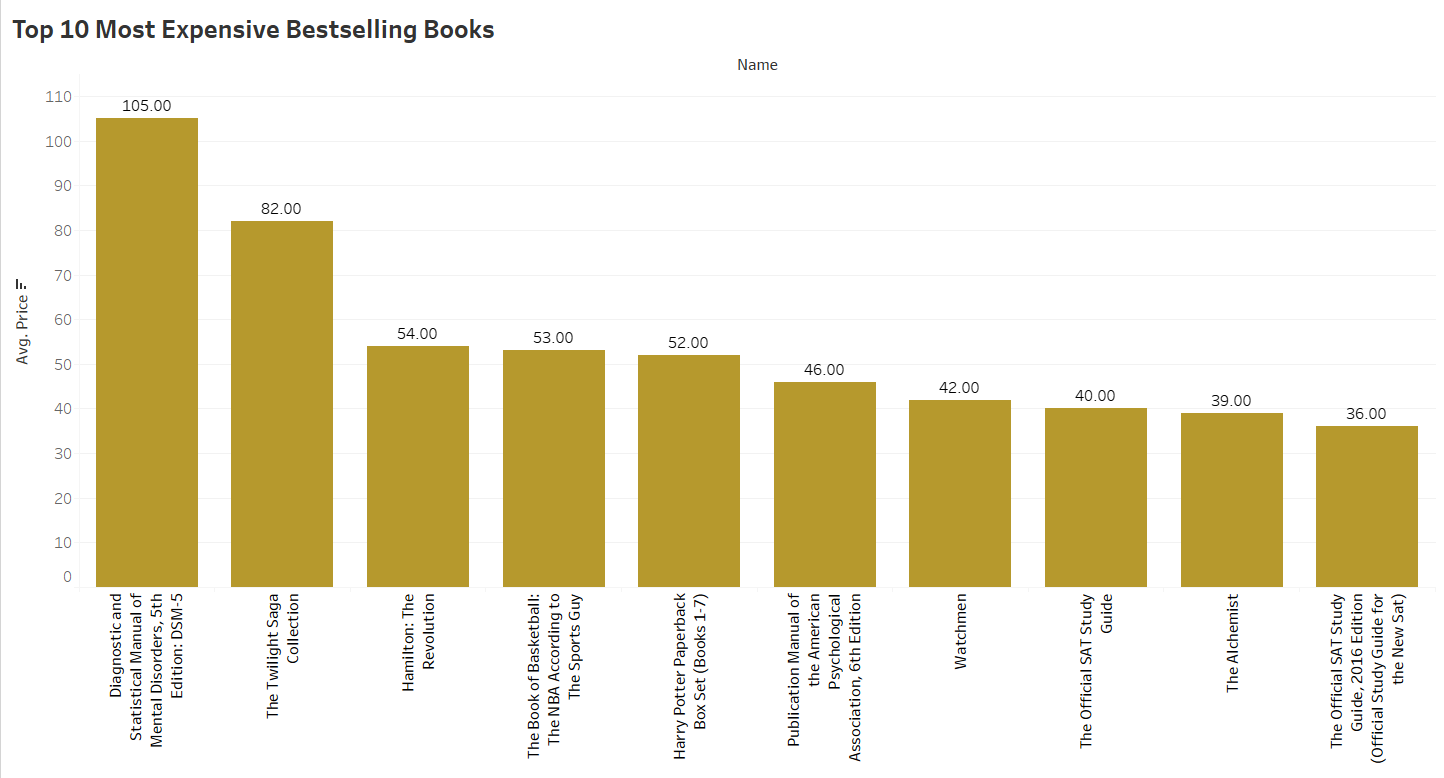

The Diagnostic and Statistical Manual of Mental Disorders (5th edition), DSM-5, comes out on top as the most expensive bestselling book, as a relatively large publication that is useful in a number of medical professions, this ranking can be seen to be right. Originally published in 2013 with about a thousand pages, it beats its newer edition (DSM-VI) by 5 spots on the price ranking.

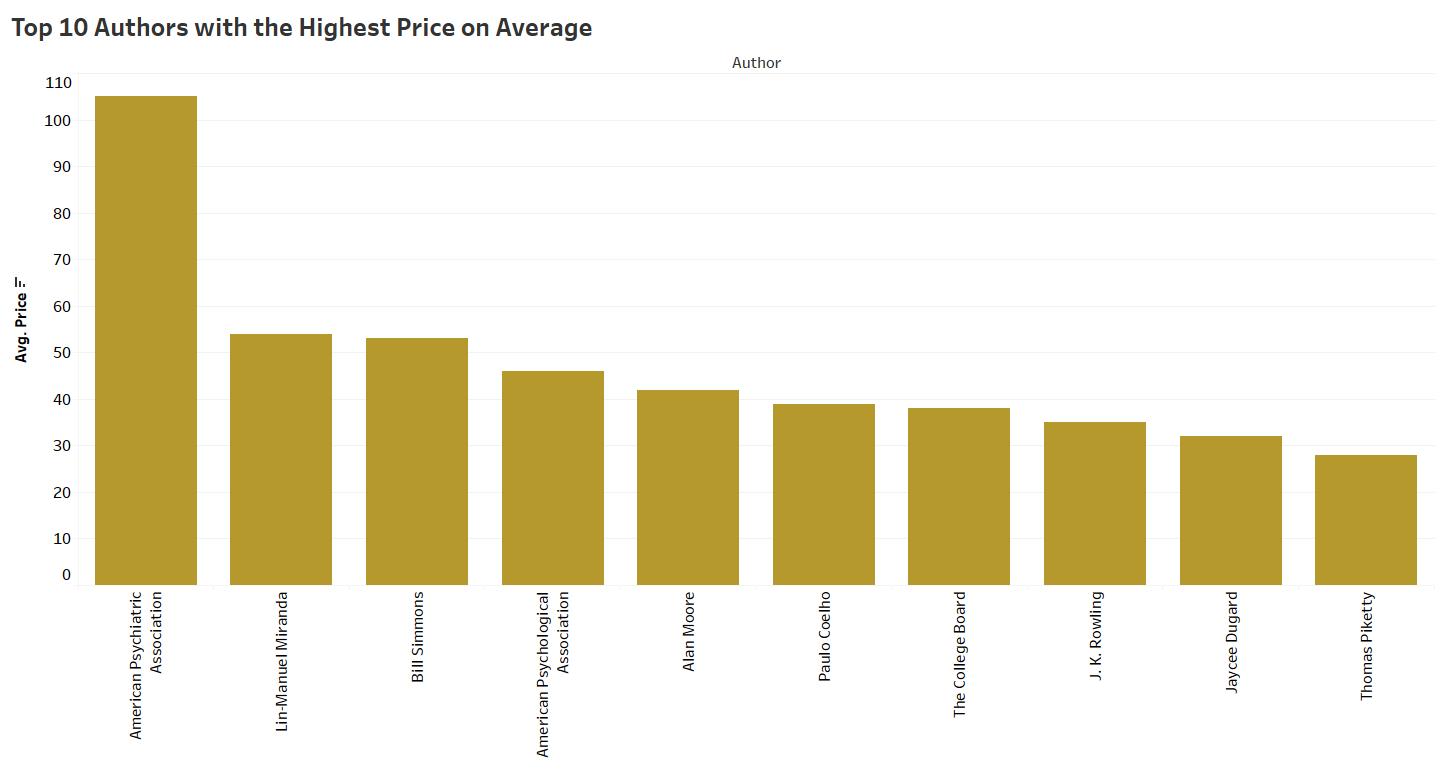

In [ ]:
df.groupby(['Genre'], as_index=False)['Price'].mean()

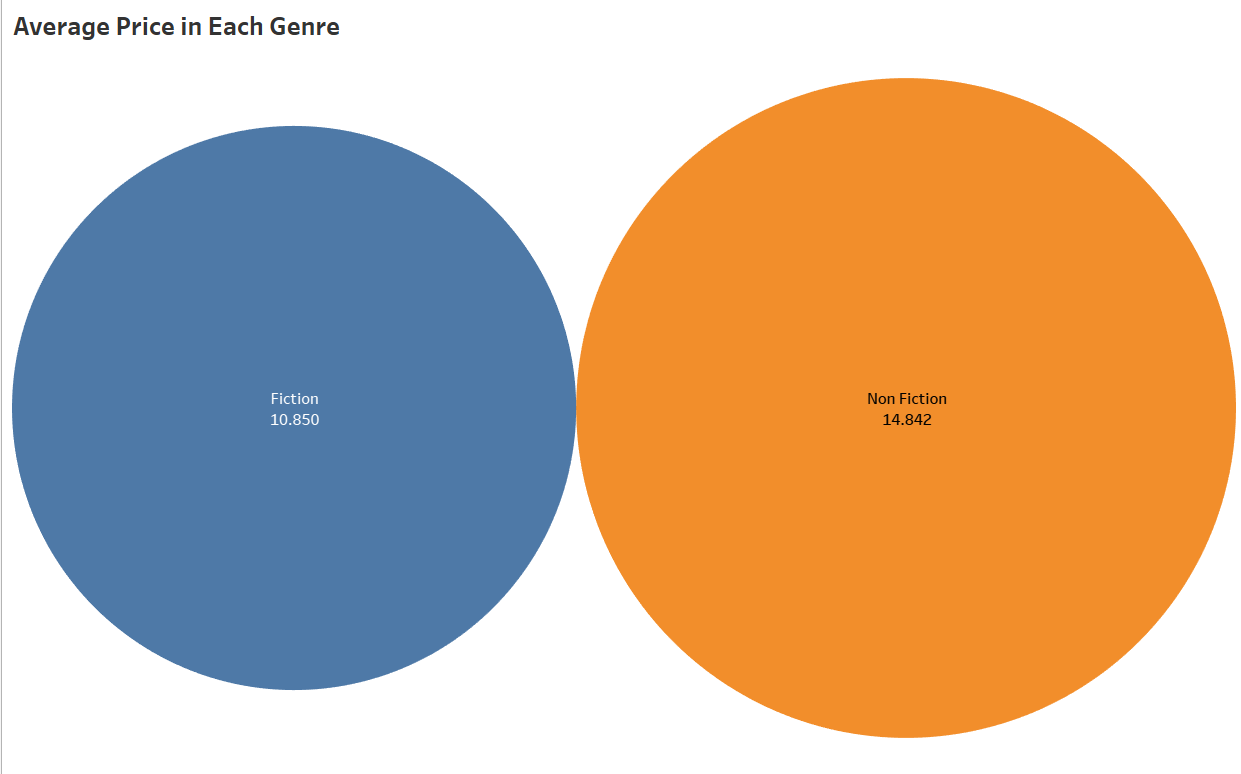

On average, non-fiction publications cost more than their fictional counterparts. Considering educational textbooks for all professions and fields, history texts and other instructional publications fall under non-fiction, there is a definite tendency for non-fiction books to cost more.

## Number of Reviews

Here we look at the patterns in the number of reviews on books in the Top 50 bestselling rankings

In [ ]:
# Most Reviewed
df.groupby(['Author','Name', 'Genre'],as_index=False)[['Weighted Rating', 'Reviews']].mean().sort_values('Reviews', ascending=False).head(10)

Nine out of ten books on the bestsellers with the most reviews on average are from the fiction genre. As this ranking looks at average reviews, non-fiction books which may not frequently come in series are not disadvantaged, however only Michelle Obama's Becoming had more than 36,000 reviews on average in the non-fiction genre.

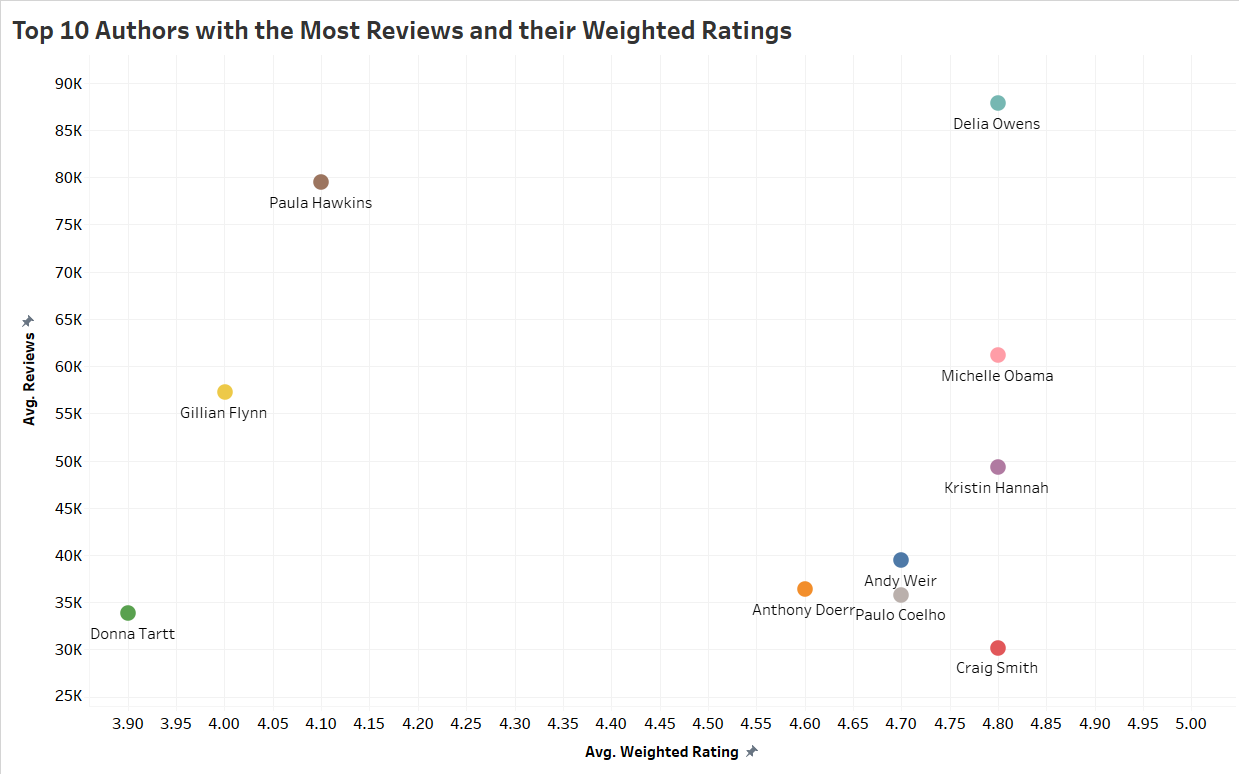

Delia Owens' 'Where the Crawdads Sing' tops the ranking for average number of reviews, it was also rated highly with a weighted ranking of 4.8. Originally published in 2018, the 'Mystery' book with just one year on the bestselling list was critically acclaimed.

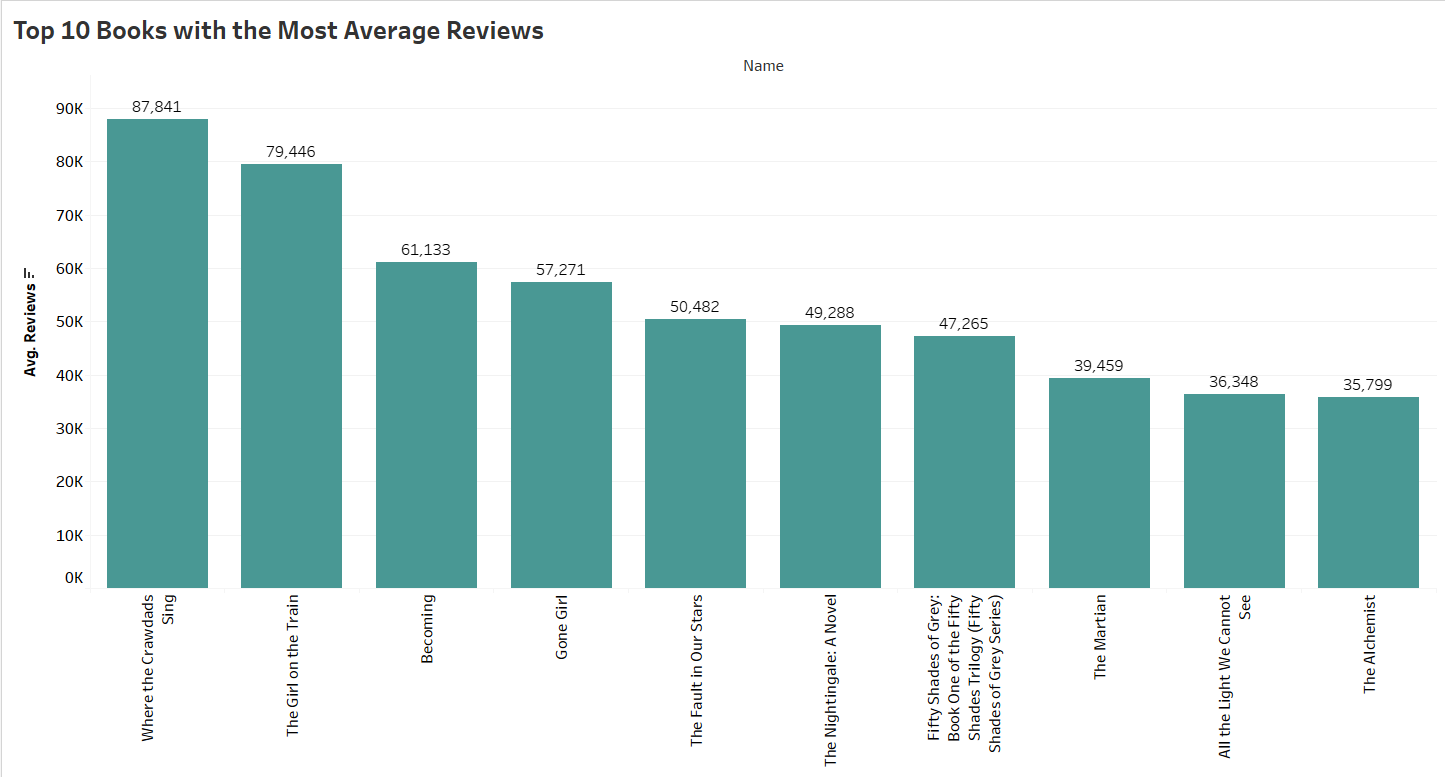

In [ ]:
df.groupby(['Genre'])['Reviews'].mean()

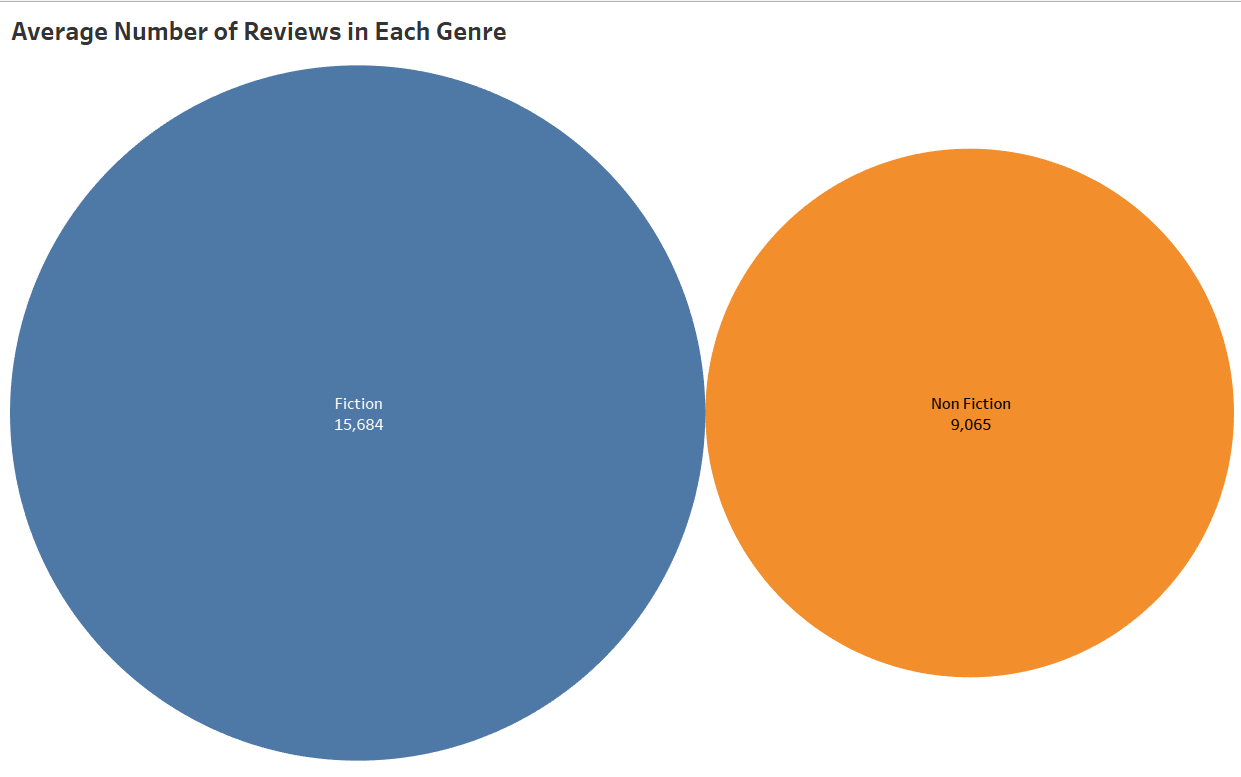

On average, fiction books accumulate more reviews than their non-fiction counterparts, with a relatively large gap between the two genres, the review culture of the fiction community is dominant

## Trends over the years

Here, we look at the trend of reviews, ratings, price of books in the Top 50 Amazon bestselling list over the decade.

![trendchart](https://miro.medium.com/max/1250/1*2oT3lEPUYLblA1glado53A.png)

The number of book reviews on Amazon bestsellers trended upwards on average with notable dips in 2013 and 2017. Fiction publications were dominant in reviews for every year except 2018.

![trendchart](https://miro.medium.com/max/1250/1*SqmtkRCZtb8z4LEFGPoU2Q.png)

The average price of books on the Amazon bestselling list has been trending downwards over the years with a sharp change from 2014 to 2015. Non-fiction books were price higher on average from 2010 downwards, with 2009 being the sole year where ficion books are more expensive on average.

![trendchart](https://miro.medium.com/max/1250/1*2L3J6edKDnTxjH372gDScg.png)

The ratings of Amazon’s Top 50 bestselling books have had a slight increase on average from about 4.5 to around 4.7. Non-fiction books were only rated higher on average in 2012 and 2013.

![trendchart](https://miro.medium.com/max/1250/1*kgcSMMY3aqZzCosdj3CmPA.png)

## Conclusion

There were more non-fiction books on the bestselling list over the years and these non-fiction books were more expensive than their counterparts on average. However, fiction books are reviewed more and rated higher on average.